In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 261MB/s]
100% 1.06G/1.06G [00:05<00:00, 211MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout

In [16]:
 #generators - divides data into small parts

 train_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/train',
     labels = 'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256,256)
 )

validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/test',
     labels = 'inferred',
     label_mode = 'int',
     batch_size =32,
     image_size=(256,256)
 )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
#normalize

def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [19]:
#create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 110ms/step - loss: 1.3693 - accuracy: 0.5786 - val_loss: 0.6832 - val_accuracy: 0.6078
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6297 - accuracy: 0.6551 - val_loss: 0.5990 - val_accuracy: 0.6632
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5213 - accuracy: 0.7383 - val_loss: 0.5771 - val_accuracy: 0.6904
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4672 - accuracy: 0.7831 - val_loss: 0.4626 - val_accuracy: 0.7742
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4084 - accuracy: 0.8166 - val_loss: 0.4390 - val_accuracy: 0.7906
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3397 - accuracy: 0.8485 - val_loss: 0.5623 - val_accuracy: 0.7616
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2696 - accuracy: 0.8832 - val_loss: 0.4769 - val_ac

In [32]:
import cv2
import matplotlib.pyplot as  plt

In [100]:
test_img = cv2.imread('/content/cat3.jpeg')

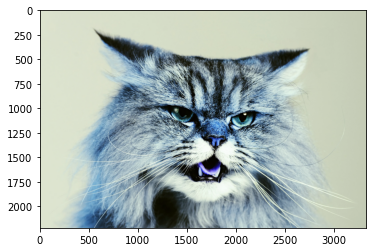

In [101]:
plt.imshow(test_img)

In [102]:
test_img.shape

(2219, 3329, 3)

In [103]:
test_img = cv2.resize(test_img,(256,256))

In [104]:
test_input = test_img.reshape((1,256,256,3))

In [105]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[3.01658e-06]], dtype=float32)

### 1. is **CAT**

### 0. is **DOG**





